# **QUE3**

***part1:***

Import needed libraries.

Storing the 2 last rows in a variable and removing them from the DataFrame.

In [30]:
import pandas as pd
from google.colab import files
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display


In [31]:
# reading the csv file and converting to DataFrame
uploaded = files.upload()
df = pd.read_csv("digits.csv")

Saving digits.csv to digits (4).csv


In [32]:
# storing the 2 last rows in a variable
last_row = df.iloc[-1:]
last_row2 = df.iloc[-2:-1]

# test
print("last_row2:  \n", last_row2.head())
print("last_row1:  \n", last_row.head())

last_row2:  
      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
200      8       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
200       0  ...         0         0         0         0         0         0   

     pixel780  pixel781  pixel782  pixel783  
200         0         0         0         0  

[1 rows x 785 columns]
last_row1:  
      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
201      9       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
201       0  ...         0         0         0         0         0         0   

     pixel780  pixel781  pixel782  pixel783  
201         0         0         0         0  

[1 rows x 785 columns]


In [33]:
# deleting the 2 last rows
df.drop(index=[200, 201], inplace=True)

# test
print(df['label'].value_counts())
print(df.head())

8    100
9    100
Name: label, dtype: int64
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      8       0       0       0       0       0       0       0       0   
1      8       0       0       0       0       0       0       0       0   
2      8       0       0       0       0       0       0       0       0   
3      8       0       0       0       0       0       0       0       0   
4      8       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel78

***part2:***

Now for siplicity as part2 suggests we convert the DataFrame into a binary one meaning the picture of the numbers 8 and 9 will be pure black and white.

In [34]:
# part2
THRESHOLD = 128
df_bin = df.copy()
df_bin[df_bin < THRESHOLD] = 0
df_bin[df_bin >= THRESHOLD] = 1

# test a sample part of the DataFrame
print(df_bin.iloc[1:18, 127:134])

    pixel126  pixel127  pixel128  pixel129  pixel130  pixel131  pixel132
1          0         0         0         0         0         0         0
2          0         0         0         0         0         0         0
3          0         0         0         0         0         0         0
4          0         0         0         0         0         0         0
5          0         0         0         0         0         0         0
6          0         0         0         0         0         0         0
7          0         0         0         1         1         1         0
8          0         0         0         0         0         0         0
9          0         0         1         1         1         0         0
10         0         1         1         0         0         1         1
11         0         0         0         0         0         0         0
12         0         0         0         0         0         0         0
13         0         0         0         0         

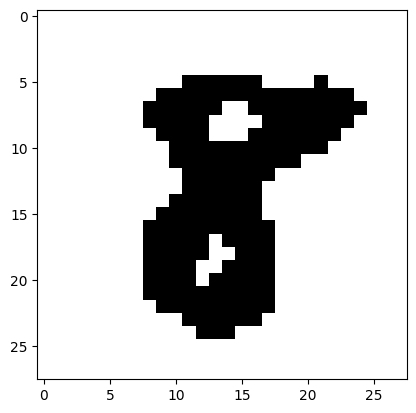

In [35]:
# part3
rand_row = random.randint(0, 199)

rand_row = df_bin.iloc[rand_row:rand_row+1, 1:]
values = []
for col in rand_row.columns:
    values.append(rand_row[col])
rand_row_array = np.array(values)
pic = rand_row_array.reshape(28, 28)
plt.imshow(pic, cmap="Greys")
plt.show()

In [36]:
# part4
## you need these imports

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    # calculate P(N = n| Y = p) which is a bernouli distribution
    # calculate integral(0 -> 1) fy * pny
    pny = stats.bernoulli.pmf(n, p)
    integral = np.sum(fy * pny) / t
    post = fy * pny / integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  df_bin[df_bin['label'] == 8].iloc[i, df_bin.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)


print(fy.mean())



IndexError: ignored

<Figure size 1000x800 with 0 Axes>